In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN  # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv(r'c:\Users\인공지능그랜드ICT\Documents\creditcard.csv')
# X=X.drop('CUST_ID',axis=1)
# 결측값 채움
X.fillna(method='ffill',inplace=True)
print(X.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10396\1132789845.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill',inplace=True)


In [ ]:
scaler = StandardScaler() # 평균=0, 표준편차=1 -> 스케일링
X_scaled = scaler.fit_transform(X) # fit기준으로 데이터에 맞춰 변형

X_normalized = normalize(X_scaled) # 가우스분포(표준 정규화)에 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 데이터프레임으로 변환

pca = PCA(n_components=2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
print(X_principal.head())

[[-0.53012807 -0.1843336  -0.01170267 ... -0.01693502  0.06504234
  -0.01104526]
 [-0.60598431  0.18468515  0.04891862 ...  0.01353886 -0.10394469
  -0.01262574]
 [-0.29520679 -0.10253929 -0.11999792 ... -0.0267653   0.17161619
  -0.00615072]
 ...
 [ 0.33760687  0.2015031  -0.03751028 ... -0.01654489 -0.01682701
  -0.00855318]
 [ 0.27995526 -0.0209297   0.05477294 ...  0.05399486 -0.05340864
  -0.00709259]
 [ 0.44763132 -0.07423847 -0.03132191 ...  0.01127217  0.14021526
  -0.01134004]]
              0         1         2         3         4         5         6   \
0      -0.530128 -0.184334 -0.011703  0.444151  0.258446 -0.065083  0.092153   
1      -0.605984  0.184685  0.048919  0.033325  0.096068  0.013198 -0.018763   
2      -0.295207 -0.102539 -0.119998  0.172915  0.039660 -0.053905  0.199823   
3      -0.397541 -0.098227 -0.022334  0.235454 -0.121404 -0.001487  0.186399   
4      -0.496045 -0.146917  0.132063  0.253772  0.070723 -0.073297  0.017888   
...          ...       ...  

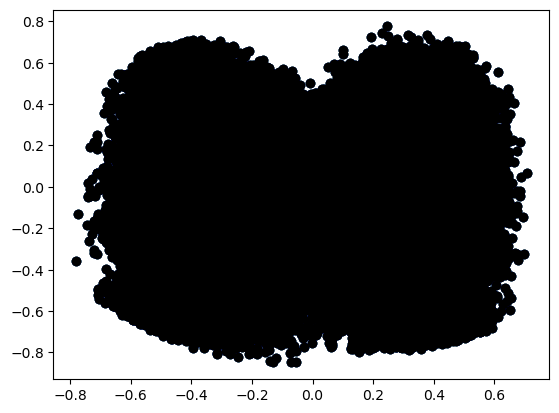

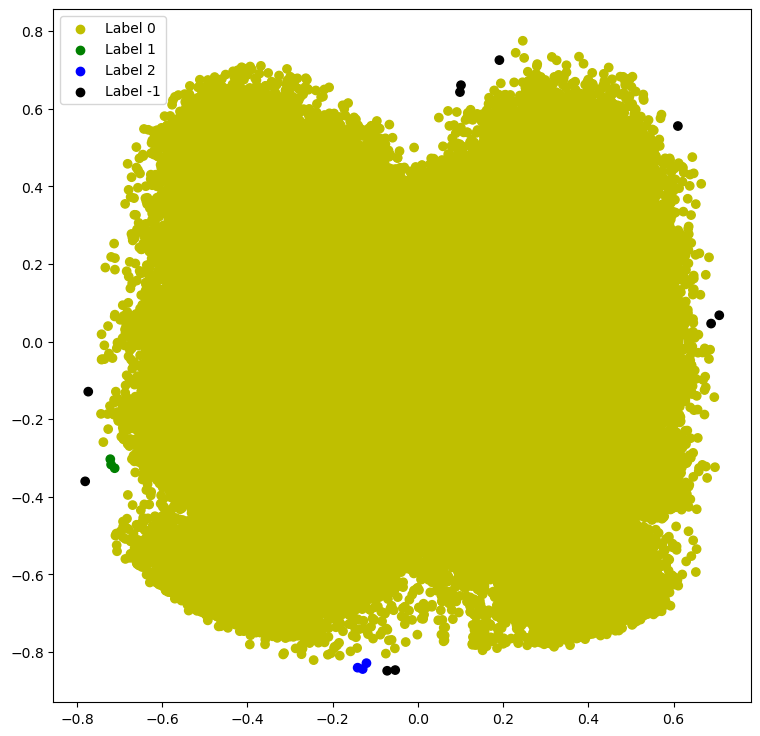

In [ ]:
db_defualt = DBSCAN(eps=0.0375,min_samples=3).fit(X_principal) # DBSCAN(밀도 기반 군집 분석)모델 생성 훈련, 엡실론 0.037, 점 3개 이상을 군집으로 인식하도록 적용해서 다시 데이터 학습시키기(fit)
labels = db_defualt.labels_ # 모든 클러스터 레이블의 넘파이 배열을 저장

colours = {} # 그래프 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] # 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal['P1'],X_principal['P2'],color = 'y');
g = plt.scatter(X_principal['P1'],X_principal['P2'],color='g');
b = plt.scatter(X_principal['P1'],X_principal['P2'],color='b');
k = plt.scatter(X_principal['P1'],X_principal['P2'],color='k'); # plot의 범례legend 구성

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'],X_principal['P2'],c = cvec) # X축, Y축에 plotting

plt.legend((r,g,b,k),('Label 0','Label 1','Label 2','Label -1')) # 범례
# plt.show()

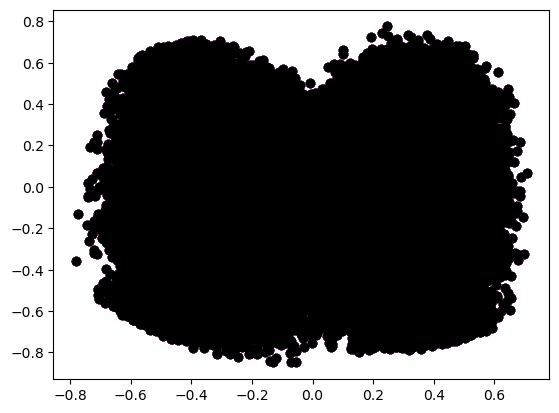

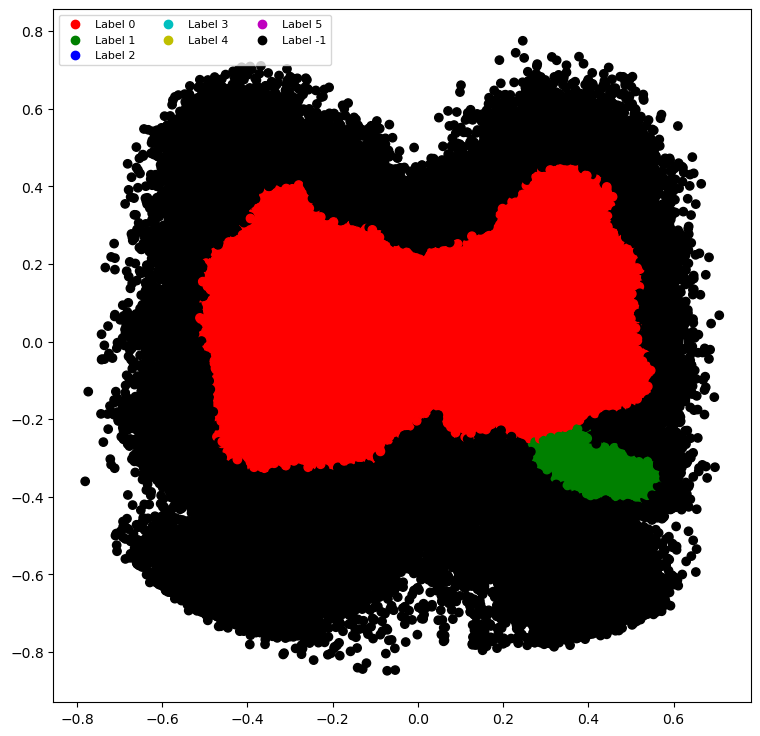

In [62]:
# 클러스터링에 대한 튜닝 필요-> min_samples을 변경한다
# PCA
db = DBSCAN(eps=0.0375,min_samples=1000).fit(X_principal) # 수정
labels1 = db.labels_ # 모든 클러스터 레이블의 넘파이 배열을 저장

colours1 = {} # 그래프 색상을 위한 레이블 생성
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r','g','b','c','y','m','k']

r = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[0])
g = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[1])
b = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[2])
c = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[3])
y = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[4])
m = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[5])
k = plt.scatter(
    X_principal['P1'],X_principal['P2'],marker='o',color = colors1[6])

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'],X_principal['P2'],c = cvec)

plt.legend((r,g,b,c,y, m, k),
           ('Label 0','Label 1','Label 2','Label 3','Label 4','Label 5','Label -1'),
           scatterpoints = 1, 
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()
